# Import the libraries Pandas and Matplotlib

# Questions

Q1: What is the evolution of the TRM Value in July of 2022?

Q2: What is the average TRM Value in 2022?

Q3: What is the maximum TRM Value registered? 

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
data = pd.read_csv("/content/drive/MyDrive/Data Analyst/Databases/TRM.csv")
data.head(5)

,VALOR,VIGENCIADESDE,VIGENCIAHASTA
0,2850.98,09/10/2002,09/10/2002
1,2854.04,10/10/2002,10/10/2002
2,2870.63,11/10/2002,11/10/2002
3,2861.16,12/10/2002,15/10/2002
4,2852.99,16/10/2002,16/10/2002


# Transform data

In [139]:
#Extract Year and Month from de Data
data["Year"] = data["VIGENCIADESDE"].str[-4:]
data["Month"] = data["VIGENCIADESDE"].str[3:-5]
data["Day"] = data["VIGENCIADESDE"].str[:2]
data.head(5)

,VALOR,VIGENCIADESDE,VIGENCIAHASTA,Year,Month,Day
0,2850.98,09/10/2002,09/10/2002,2002,10,09
1,2854.04,10/10/2002,10/10/2002,2002,10,10
2,2870.63,11/10/2002,11/10/2002,2002,10,11
3,2861.16,12/10/2002,15/10/2002,2002,10,12
4,2852.99,16/10/2002,16/10/2002,2002,10,16


In [140]:
#Rename Column
data.rename(columns={"VALOR":"Value"}, inplace=True)

In [141]:
#DELETE UNNECESARY COLUMNS
data.drop(["VIGENCIADESDE", "VIGENCIAHASTA"], axis = 1, inplace = True)
data.head(5)

,Value,Year,Month,Day
0,2850.98,2002,10,09
1,2854.04,2002,10,10
2,2870.63,2002,10,11
3,2861.16,2002,10,12
4,2852.99,2002,10,16


In [142]:
#Change column types
data["Year"] = pd.to_numeric(data["Year"])
data["Month"] = pd.to_numeric(data["Month"])
data["Day"] = pd.to_numeric(data["Day"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7367 entries, 0 to 7366
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   7367 non-null   float64
 1   Year    7367 non-null   int64  
 2   Month   7367 non-null   int64  
 3   Day     7367 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 230.3 KB


In [143]:
#Creation Month Names
months = {1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 
          7:"July", 8:"August", 9:"September", 10:"October", 11:"November", 
          12:"December"}

months[2]

'February'

In [144]:
data["MonthName"] = data["Month"].map(months)
data.tail(5)

,Value,Year,Month,Day,MonthName
7362,4627.46,2022,7,13,July
7363,4558.05,2022,7,14,July
7364,4519.65,2022,7,15,July
7365,4395.63,2022,7,16,July
7366,4315.41,2022,7,19,July


# Q1: What is the evolution of the TRM Value in July of 2022?

In [145]:
#Filter the colum "Month" to "July" and "Year" to 2022

In [146]:
import functools #With this library filter the columns

In [147]:
#Create function to filter de columns
def filter(*conditions):
    return functools.reduce(np.logical_and, conditions)

In [148]:
data_month22 = data["Month"] == 7 #Filter the Month column by July
data_year22 = data["Year"] == 2022 #Filter the Year column by 2022
trm_july22 = data[filter(data_month22, data_year22)]
trm_july22

,Value,Year,Month,Day,MonthName
7355,4151.21,2022,7,1,July
7356,4198.77,2022,7,2,July
7357,4259.86,2022,7,6,July
7358,4348.68,2022,7,7,July
7359,4369.70,2022,7,8,July
7360,4388.27,2022,7,9,July
7361,4513.28,2022,7,12,July
7362,4627.46,2022,7,13,July
7363,4558.05,2022,7,14,July
7364,4519.65,2022,7,15,July


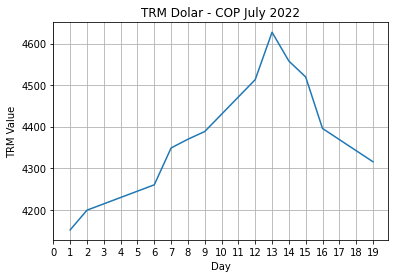

In [149]:
#Graph the chart with Pyplot
plt.plot(trm_july22["Day"], trm_july22['Value'])
plt.xlabel("Day")
plt.ylabel("TRM Value")
plt.title("TRM Dolar - COP July 2022")
plt.grid(True)

x = np.arange(0, 20, 1)
plt.xticks(x)

plt.show()

# Q2: What is the average TRM Value in 2022?

In [152]:
#For measure the average Value, use the funcion df.mean()
avg22 = data[data_year22]
averagetrm = avg22["Value"].mean()

In [153]:
print("The average TRM Value in 2022 is {}".format(averagetrm))

The average TRM Value in 2022 is 3957.3114503816787


# Q3: What is the date with maximum TRM Value registered? 

In [157]:
row = data["Value"].idxmax()
data.iloc[[row]]

,Value,Year,Month,Day,MonthName
7362,4627.46,2022,7,13,July


July 13 was the date with the maximum TRM value registered